Overview:

The non-profit foundation Alphabet Soup wants to create an algorithm that can predict
whether applicants will be successful with received funding. With my knowledge of machine
learning and neural networks, I must use dataset features to create a binary classifier
that has the capability of predicting whether applicants will be successful if funded by
Alphabet Soup. Over the years, more than 34,000 organizations have received funding
from Alphabet Soup.

Results:

Data Preprocessing
the dataset is necessary due to it's size, I started by processing the data and removing
irrelevant information. After dropping EIN and NAME, the rest of the column names
are considered useful features for the model and NAME was later added back into
the second test for the purpose of binning.

In [ ]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


# I then looked at the unique values for each of the columns by using several data
points as a cutoff to bin “rare” variables together and value of “Other” for unique
values. The data was then split into two categories, training, and testing sets. The
target variable for the model is labeled “IS_SUCCESSFUL” which has either a vale
of 1 for yes or value of 0 for no

Categorical variables were then encoded by get_dummies() after checking if the binning
was successful.

In [ ]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = list(atv_counts.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_dummies = pd.get_dummies(application_df)

In [ ]:
# Split our preprocessed data into our features and target arrays
X = numeric_dummies.drop(['IS_SUCCESSFUL'], axis=1)
y = numeric_dummies['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Compiling, Training, and Evaluating the Model

There was a total of three layers for each model after applying the Neural Networks. The
number of hidden nodes were then determined by the number of input features which
was two.

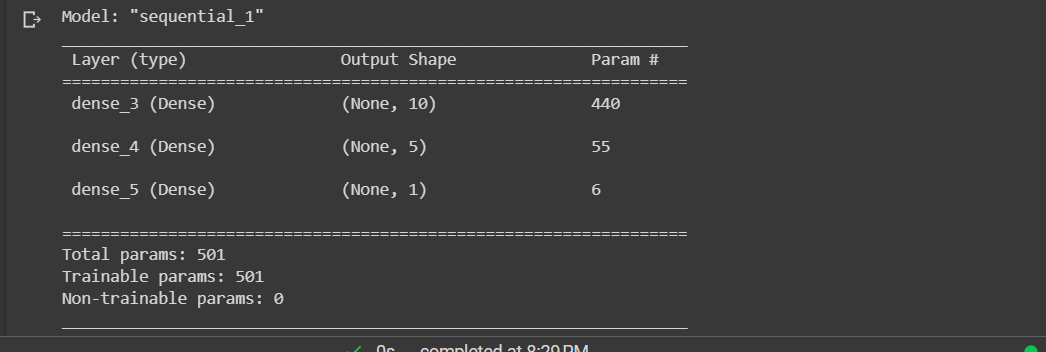

With my optimization model, I was able to achieve target performance with four
layers and four hidden layers.


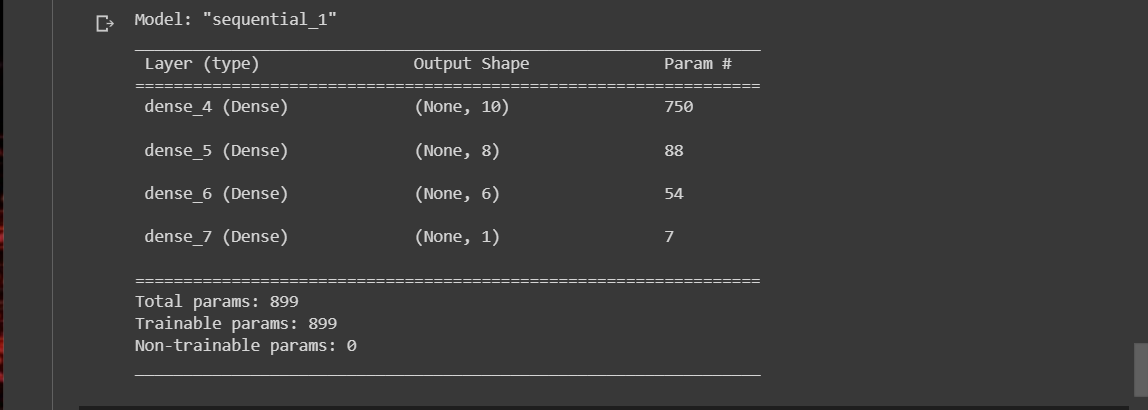

Summary:

My first deep learning model that I developed was unable to achieve the
accuracy higher than 73%. With the optimization model I was able to achieve
accuracy higher then 75%. My recommendation to solve the
classification problem would be to try a different type of algorithm testing. I would use the Random Forest Classifier because it can help by identifying the key
predictor columns, allowing us to potentially improve the accuracy.
Another method I would recommend is adding more dataset columns that are useful and
even going back to general basics of simple pandas for identifying more important
key features. As a Data Analyst, it is important to experiment with as
many steps as possible to fine tune the data as much as necessary to increase a
model’s overall performance.